## Student Academic Performance Analysis and Visualization
Description: In this project, we analyze a real-world student performance dataset to understand how different demographic, family, and academic factors affect students’ exam results. Using Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn, we perform data cleaning, exploratory data analysis (EDA), and visualization to extract meaningful insights.

####  Import libraries

In [160]:
# For data manipulation
import numpy as np
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading data from csv file

In [161]:
df = pd.read_csv("./data_set/students_result.csv")

#### Quick Look at the Data

In [162]:

df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


#### Numerical Data Overview

In [163]:
print("Numerical Data Overview")
df.describe()

Numerical Data Overview


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


#### Quick Look at Data Types and Non-Nulls”

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


#### Null Values Summary

In [165]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

#### Remove unnecessary column

In [166]:
# Remove unnecessary column
df = df.drop("Unnamed: 0", axis = 1)
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


After removing the unnecessary column "Unnamed: 0" from the DataFrame and shows the first 5 rows.

#### Gender distribution

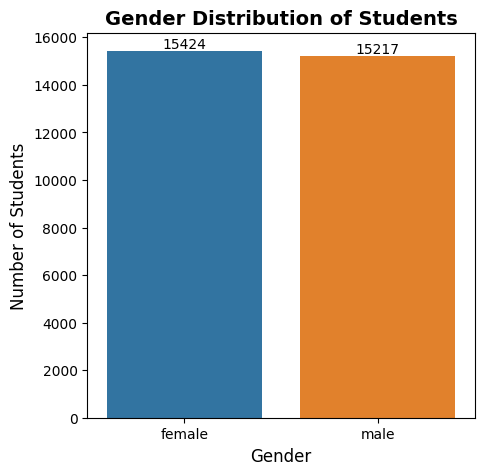

In [167]:
# plot figure size
plt.figure(figsize=(5,5))
ax = sns.countplot(
    data=df,
    x="Gender",
    hue = "Gender",
)

# for the number of students
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Titles & labels
ax.set_title("Gender Distribution of Students", fontsize=14, fontweight="bold")
ax.set_xlabel("Gender", fontsize=12)
ax.set_ylabel("Number of Students", fontsize=12)
plt.show()

The chart shows the gender distribution of students. There are 15,424 female students and 15,217 male students. The numbers are very close, which means the dataset is almost gender-balanced, with females being slightly higher than males. Overall, there is no major gender gap in the student population.

### Average Score Comparison Across Subjects

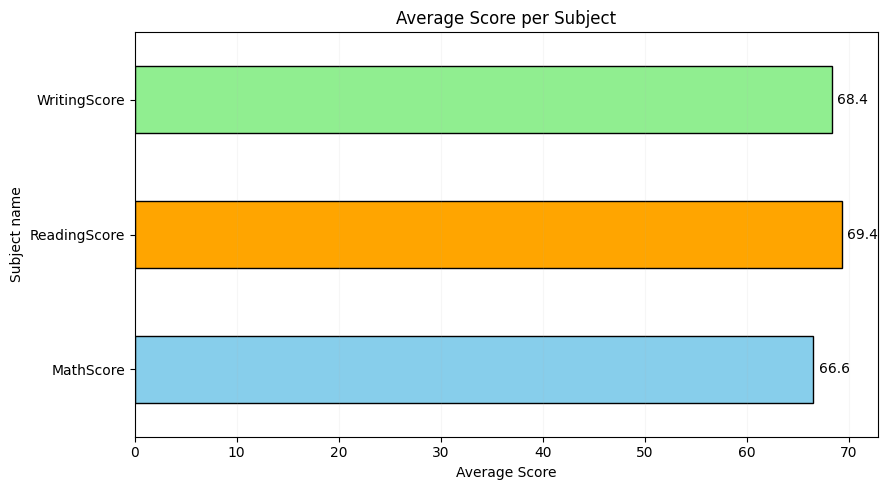

In [168]:
avg_scores = df[["MathScore","ReadingScore","WritingScore"]].mean()
plt.figure(figsize=(9,5))
ax = avg_scores.plot(
    kind="barh",
    color=["skyblue", "orange", "lightgreen"],
    edgecolor="black"
)

# plot info
plt.title("Average Score per Subject")
plt.xlabel("Average Score")
plt.ylabel("Subject name")
plt.grid(axis="x", alpha=0.1)


# value labels
for i, v in enumerate(avg_scores):
    plt.text(v + 0.5, i, f"{v:.1f}", va="center")

plt.tight_layout()
plt.show()


The chart shows that students perform best in Reading, with an average score of 69.4. The average score in Writing is slightly lower at 68.4, while Math has the lowest average score of 66.6. This means students generally score higher in Reading and Writing compared to Math, indicating that Math may be the subject where students need more improvement.

### Average score by gender

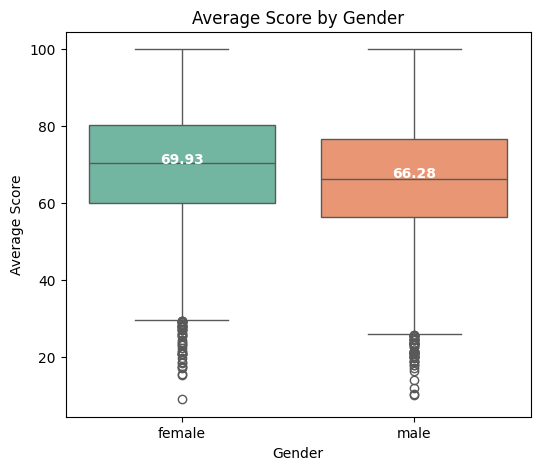

In [169]:
df["AvgScore"] = df[["MathScore","ReadingScore","WritingScore"]].mean(axis=1)

# Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="Gender", y="AvgScore", palette="Set2", hue = 'Gender')

# Add actual mean above each box
gender_avg = df.groupby("Gender")["AvgScore"].mean()
for i, avg in enumerate(gender_avg):
    plt.text(i, avg + 0.5, f'{avg:.2f}', ha='center', color='white', weight='bold')

plt.title("Average Score by Gender")
plt.ylabel("Average Score")
plt.show()

The boxplot shows the average scores of students by gender. From the plot, we can see that female students have a slightly higher average score (≈ 69.9) than male students (≈ 66.3).
Both genders have a similar range of scores, with most students scoring between around 60 and 80. There are some outliers, mostly low scores below 30, which appear as small circles below the boxes.
Overall, female students performed a bit better on average, but both groups have a wide variation in scores, showing that individual performance varies a lot within each gender.

### Impact of Parents Education Level on Students Academic Performance

In [170]:
# groub py parent education level
groupByParentsDegree = df.groupby("ParentEduc").agg({"MathScore": 'mean', "ReadingScore":'mean', "WritingScore":'mean'})
groupByParentsDegree

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


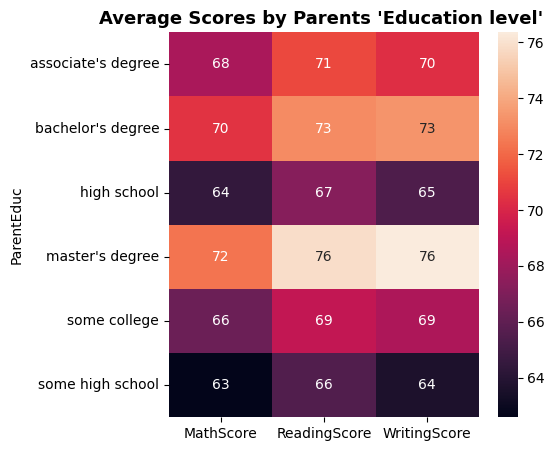

In [171]:
# plot figure size
plt.figure(figsize=(5,5))
sns.heatmap(groupByParentsDegree, annot = True)
plt.title("Average Scores by Parents 'Education level' ", fontsize=13, fontweight="bold")
plt.show()

The heatmap shows the average Math, Reading, and Writing scores based on parents’ education level. Students whose parents have a master’s degree score the highest in all three subjects Scores generally increase with higher parental education, while students from some high school or high school backgrounds have lower average scores. Overall, the chart suggests that parents’ education level has a positive impact on students’ academic performance.

### Impact of Parents Marital status on Students Academic Performance

In [172]:
# groub py parent marital status
groupByParentsMaritalSts = df.groupby("ParentMaritalStatus").agg({"MathScore": 'mean', "ReadingScore":'mean', "WritingScore":'mean'}).reset_index()
groupByParentsMaritalSts

,ParentMaritalStatus,MathScore,ReadingScore,WritingScore
0,divorced,66.691197,69.655011,68.799146
1,married,66.657326,69.389575,68.420981
2,single,66.165704,69.157250,68.174440
3,widowed,67.368866,69.651438,68.563452


<Figure size 700x500 with 0 Axes>

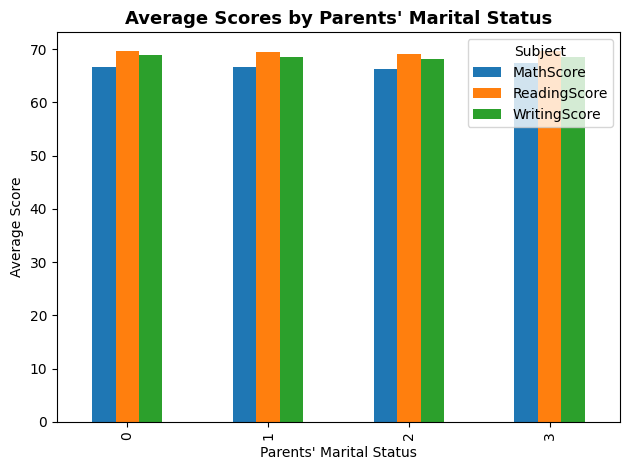

In [173]:
# bar chart figure size
plt.figure(figsize=(7,5))

# create bar chart
groupByParentsMaritalSts.plot(kind="bar")
plt.title("Average Scores by Parents' Marital Status", fontsize=13, fontweight="bold")
plt.xlabel("Parents' Marital Status")
plt.ylabel("Average Score")
plt.legend(title="Subject")

# fit the plot elemens
plt.tight_layout()

# show the chart
plt.show()


The chart shows the average Math, Reading, and Writing scores of students based on their parents’ marital status. Overall, the scores are quite similar across all groups. Students with widowed parents (index 3) have slightly higher average scores in all three subjects. Students from divorced (0), married (1), and single (2) parents have nearly the same average scores, with reading scores being slightly higher than math and writing for all groups. In conclusion there is no impact on the student's score due to their marital status.

### Weekly Study Hours and Academic Performance

In [174]:
# groub py parent marital status
groupByWeeklyHours = df.groupby("WklyStudyHours").agg({"MathScore": 'mean', "ReadingScore":'mean', "WritingScore":'mean'}).reset_index()
groupByWeeklyHours

,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,5 - 10,66.870491,69.660532,68.636280
1,< 5,64.580359,68.176135,67.090192
2,> 10,68.696655,70.365436,69.777778


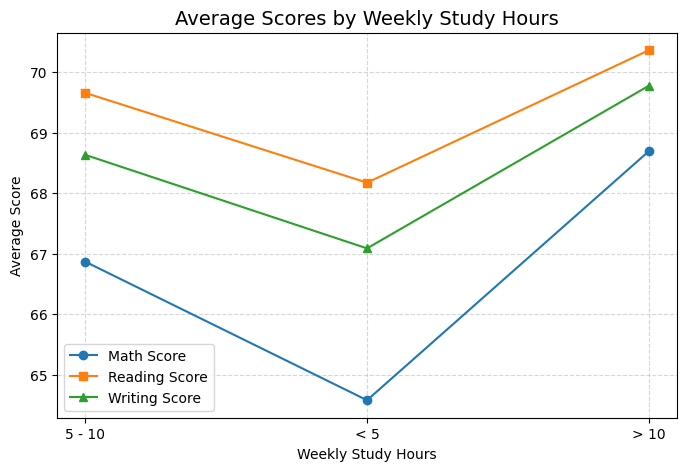

In [175]:
# Line chart - Average scores by Weekly Study Hours
plt.figure(figsize=(8,5))

# Plot Math, Reading, Writing scores
plt.plot(groupByWeeklyHours['WklyStudyHours'], groupByWeeklyHours['MathScore'], marker='o', label='Math Score')
plt.plot(groupByWeeklyHours['WklyStudyHours'], groupByWeeklyHours['ReadingScore'], marker='s', label='Reading Score')
plt.plot(groupByWeeklyHours['WklyStudyHours'], groupByWeeklyHours['WritingScore'], marker='^', label='Writing Score')

# Titles and labels
plt.title("Average Scores by Weekly Study Hours", fontsize=14)
plt.xlabel("Weekly Study Hours")
plt.ylabel("Average Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

This graph shows that students who study more than 10 hours per week achieve the highest average scores in math, reading, and writing. Those who study between 5 and 10 hours weekly score lower than the first group but still perform better than students who study less than 5 hours per week, who have the lowest average scores across all subjects. Overall, there is a clear trend that more weekly study time is associated with higher academic performance in all three areas.

### Link Between Math Scores and Writing Scores

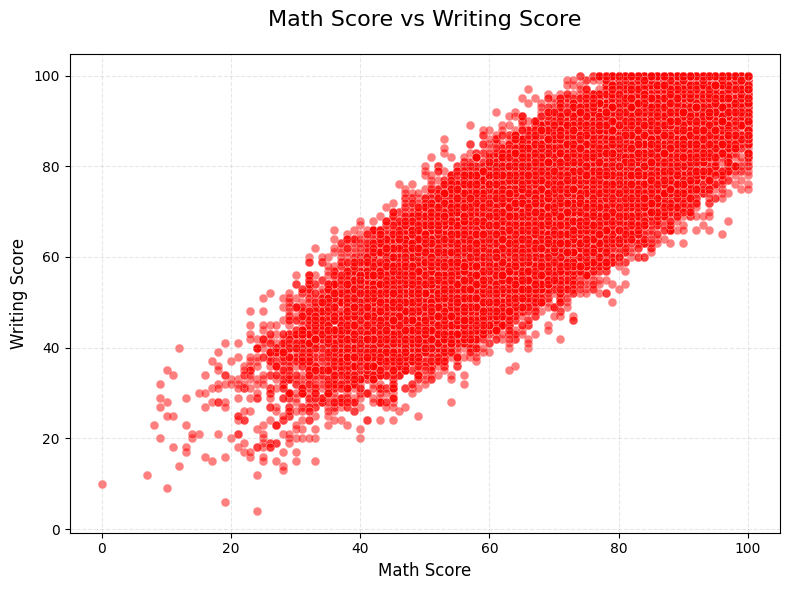

In [176]:
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(df["MathScore"], df["WritingScore"], color='red', s=40, alpha=0.5, edgecolor='white', linewidth=0.3)

# Labels and title
plt.title("Math Score vs Writing Score", fontsize=16, pad=20)
plt.xlabel("Math Score", fontsize=12)
plt.ylabel("Writing Score", fontsize=12)

# Grid
plt.grid(True, alpha=0.3, linestyle='--')

#layout for better spacing
plt.tight_layout()
plt.show()

This graph clearly shows a positive link between Math scores and Writing scores. The dots are mostly clustered in the top-right corner, which tells us that students who score high in Math—between 80 and 100—also tend to score high in Writing, usually between 70 and 90. Similarly, those with low Math scores, below 40, generally have low Writing scores as well, often below 50. In simple terms, being good at Math usually means a student is also good at Writing, and the two subjects tend to improve together.

### Link Between Reading Scores and Writing Scores

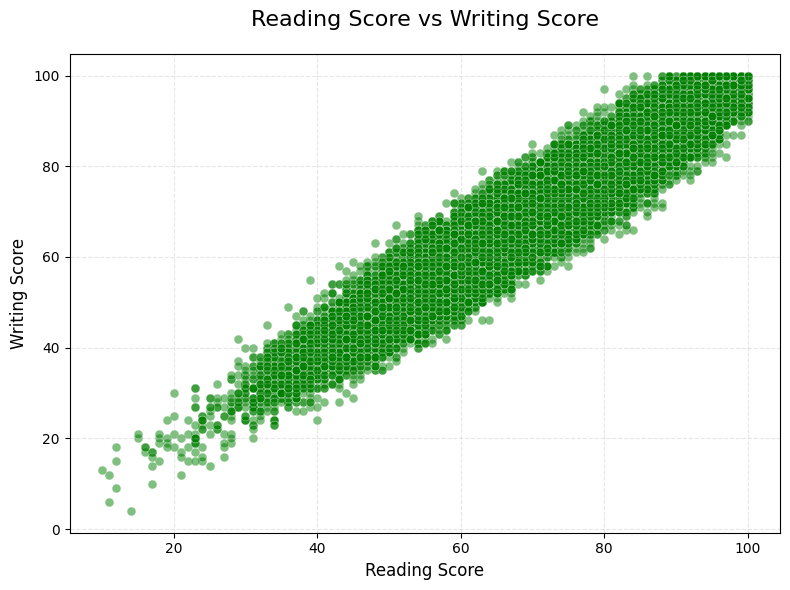

In [177]:
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(df["ReadingScore"], df["WritingScore"], color='green', s=40, alpha=0.5, edgecolor='white', linewidth=0.3)

# Labels and title
plt.title("Reading Score vs Writing Score", fontsize=16, pad=20)
plt.xlabel("Reading Score", fontsize=12)
plt.ylabel("Writing Score", fontsize=12)

# Grid
plt.grid(True, alpha=0.3, linestyle='--')

#layout for better spacing
plt.tight_layout()
plt.show()

The Reading Score vs Writing Score graph shows a very strong connection between these two subjects. Almost all dots are closely clustered along a diagonal line from bottom-left to top-right.

Students who score high in Reading almost always score high in Writing too, and those with low Reading scores also have low Writing scores. There is very little variation — the two scores move together almost perfectly.

Reading and Writing skills go hand in hand. If a student is good at one, they are almost certainly good at the other.

### Effect of Sports Practice on Average Score

C:\Users\SHAKIL BABU\AppData\Local\Temp\ipykernel_14080\2062226444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="PracticeSport", y="AvgScore", palette=['skyblue','lightgreen','salmon'])


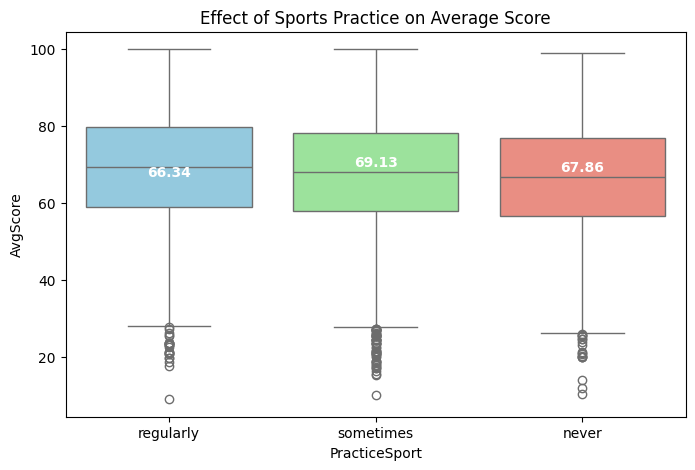

In [178]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="PracticeSport", y="AvgScore", palette=['skyblue','lightgreen','salmon'])

# Add actual mean above each box
gender_avg = df.groupby("PracticeSport")["AvgScore"].mean()
for i, avg in enumerate(gender_avg):
    plt.text(i, avg + 0.5, f'{avg:.2f}', ha='center', color='white', weight='bold')

# title and show the plot
plt.title("Effect of Sports Practice on Average Score")
plt.show()


Students who practice sports sometimes score the highest on average (median 69.1), while those who do it regularly score lowest (66.3), and never falls in between (67.9).
The gaps are tiny—just 2–3 points—and all groups show similar score spread plus lots of low outliers.

Sometimes sports involvement links to slightly better grades, but the overall impact is very small and likely not a big factor.

### Top 10 students by average score

In [179]:
# Top 10 students
topTenStudents = df[['Gender', 'AvgScore', 'MathScore', 'ReadingScore', 'WritingScore']].sort_values(by='AvgScore', ascending=False).head(10)
topTenStudents

,Gender,AvgScore,MathScore,ReadingScore,WritingScore
30605,female,100.0,100,100,100
30060,female,100.0,100,100,100
3460,male,100.0,100,100,100
2683,male,100.0,100,100,100
23353,male,100.0,100,100,100
432,female,100.0,100,100,100
26527,male,100.0,100,100,100
4935,female,100.0,100,100,100
2983,male,100.0,100,100,100
981,female,100.0,100,100,100


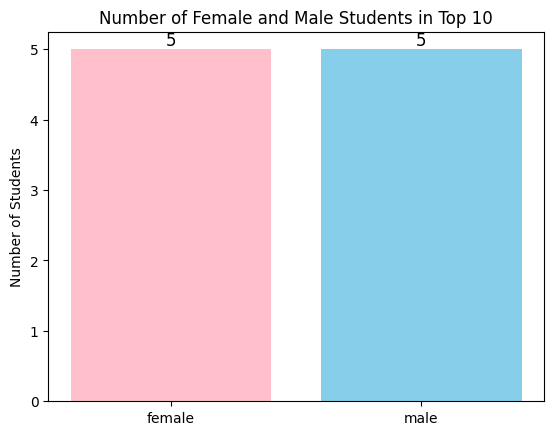

In [180]:
# Count gender
genderCount = topTenStudents['Gender'].value_counts()

# Simple bar plot
plt.bar(genderCount.index, genderCount.values, color=['pink','skyblue'])
plt.title('Number of Female and Male Students in Top 10')
plt.ylabel('Number of Students')

# Show numbers on top of bars
for i, v in enumerate(genderCount.values):
    plt.text(i, v + 0.05, str(v), ha='center', fontsize=12)

plt.show()

The avobe bar chart shows, the top 10 students by overall score consist of exactly 5 females and 5 males. This shows a perfectly balanced gender distribution among the highest performers, with no noticeable advantage for either females or males. The 50-50 split suggests that, at least in this limited dataset, top academic achievement is equally shared between both genders.

### Student Consistency: Total Score vs Score Range

In [181]:
# Total score
df["TotalScore"] = df[["MathScore","ReadingScore","WritingScore"]].sum(axis=1)

# Score range (max-min)
df["ScoreRange"] = df[["MathScore","ReadingScore","WritingScore"]].max(axis=1) - \
                   df[["MathScore","ReadingScore","WritingScore"]].min(axis=1)

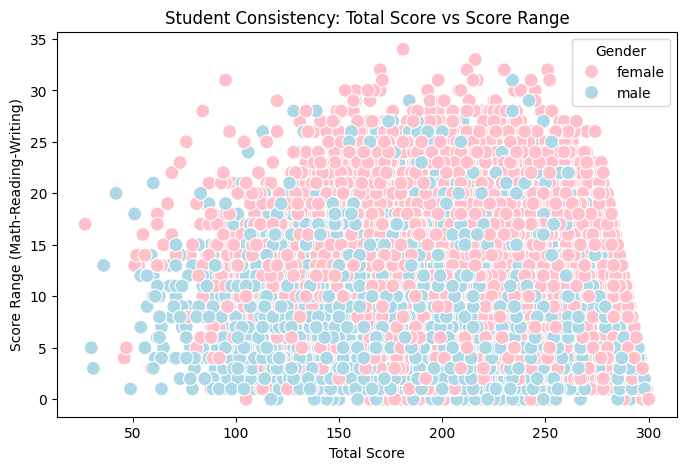

In [182]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="TotalScore", y="ScoreRange", hue="Gender", s=100, palette=["pink","lightblue"])
plt.title("Student Consistency: Total Score vs Score Range")
plt.xlabel("Total Score")
plt.ylabel("Score Range (Math-Reading-Writing)")
plt.show()


The plot shows Total Score vs Score Range, with pink for females and blue for males. Most students have high scores and low ranges, meaning they perform well and consistently. Some students have low scores or high ranges, showing weak performance or inconsistency. Females generally score slightly higher, while males show more variation. This helps identify strong, consistent students and those who may need support.